### Name : Weerasinghe K.N.
### Index No : 190672T

In [186]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Connected Component Analysis

> *In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.*


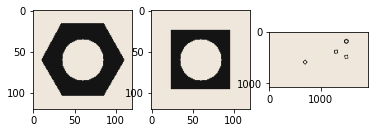

In [187]:
hexnut_template = cv.imread("Sources/hexnut_template.png", cv.IMREAD_COLOR)
squarenut_template =  cv.imread("Sources/squarenut_template.png", cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread("Sources/conveyor_f100.png", cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

>*Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.*

20.0 20.0 20.0


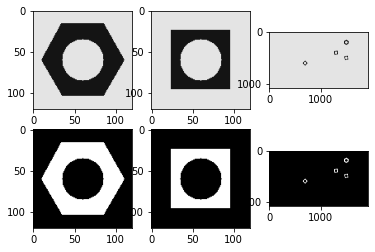

In [188]:
hexnut_template = cv.cvtColor(hexnut_template,cv.COLOR_RGB2GRAY)
squarenut_template =  cv.cvtColor(squarenut_template,cv.COLOR_RGB2GRAY)
conveyor_f100 =  cv.cvtColor(conveyor_f100,cv.COLOR_RGB2GRAY)

ret1,th1 = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print(ret1,ret2,ret3)

fig, ax = plt. subplots(2,3)
ax[0][0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[0][1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[0][2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
ax[1][0].imshow(cv.cvtColor(th1, cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(th2, cv.COLOR_BGR2RGB))
ax[1][2].imshow(cv.cvtColor(th3, cv.COLOR_BGR2RGB))


>*Carry out morphological closing to remove small holes inside the foreground. Use a $3×3$ kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.*

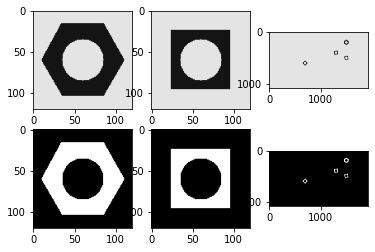

In [189]:
kernel=np.ones((3,3),np.uint8)
closing_1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing_2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing_3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(2,3)
ax[0][0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[0][1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[0][2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
ax[1][0].imshow(cv.cvtColor(closing_1, cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(closing_2, cv.COLOR_BGR2RGB))
ax[1][2].imshow(cv.cvtColor(closing_3, cv.COLOR_BGR2RGB))

>*Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions.<br>How many connected components are detected in each image?<br>What are the statistics? Interpret these statistics.<br>What are the centroids?<br>For the hexnut template, you should get the object area in pixel as approximately 4728.*

Calculations of image - 1
     Number of connected components = 2
     Statistics... 
         1. The leftmost (x) coordinate = 10
         2. The topmost (y) coordinate = 16
         3. The horizontal size of the bounding box = 101
         4. The vertical size of the bounding box = 88
         5. The total area (in pixels) = 4728
     Centroids = [[59.33684864 59.63513234]
 [59.83375635 59.22356176]]
Calculations of image - 2
     Number of connected components = 2
     Statistics... 
         1. The leftmost (x) coordinate = 24
         2. The topmost (y) coordinate = 24
         3. The horizontal size of the bounding box = 72
         4. The vertical size of the bounding box = 72
         5. The total area (in pixels) = 3227
     Centroids = [[59.5875772  59.5875772 ]
 [59.19677719 59.19677719]]
Calculations of image - 3
     Number of connected components = 5
     Statistics... 
         1. The leftmost (x) coordinate = 1454
         2. The topmost (y) coordinate = 150
         3.

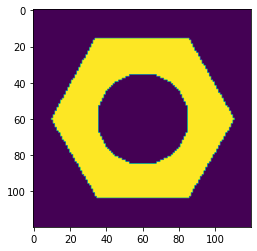

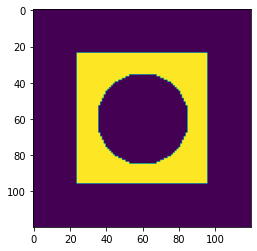

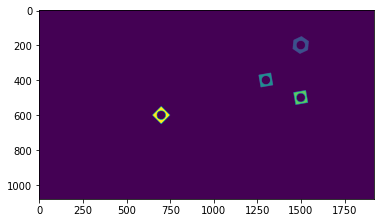

In [190]:
class Output:
    def __init__(self,num_labels,lables,stats,centroids):
        self.num_lables=num_labels
        self.lables=lables
        self.stats=stats
        self.centroids=centroids
    
    def Print(abc,i):
        print("Calculations of image -",i)
        print("     Number of connected components =",abc.num_lables)
        fig, ax = plt. subplots()
        Image=abc.lables
        ax.imshow(Image)
        print("     Statistics... ")
        for j in range(1,abc.num_lables):
            print("         1. The leftmost (x) coordinate =",abc.stats[j,cv.CC_STAT_LEFT])
            print("         2. The topmost (y) coordinate =",abc.stats[j,cv.CC_STAT_TOP])
            print("         3. The horizontal size of the bounding box =",abc.stats[j,cv.CC_STAT_WIDTH])
            print("         4. The vertical size of the bounding box =",abc.stats[j,cv.CC_STAT_HEIGHT])
            print("         5. The total area (in pixels) =",abc.stats[j,cv.CC_STAT_AREA])
        print("     Centroids =",abc.centroids)

Connectivity=4
O1 = cv.connectedComponentsWithStats(closing_1, Connectivity, cv.CV_32S)
O2 = cv.connectedComponentsWithStats(closing_2, Connectivity, cv.CV_32S)
O3 = cv.connectedComponentsWithStats(closing_3, Connectivity, cv.CV_32S)
Os=[O1,O2,O3]

for j,i in enumerate(Os):
    Os[j]=Output(i[0],i[1],i[2],i[3])
    Os[j].Print(j+1)

>*Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.*

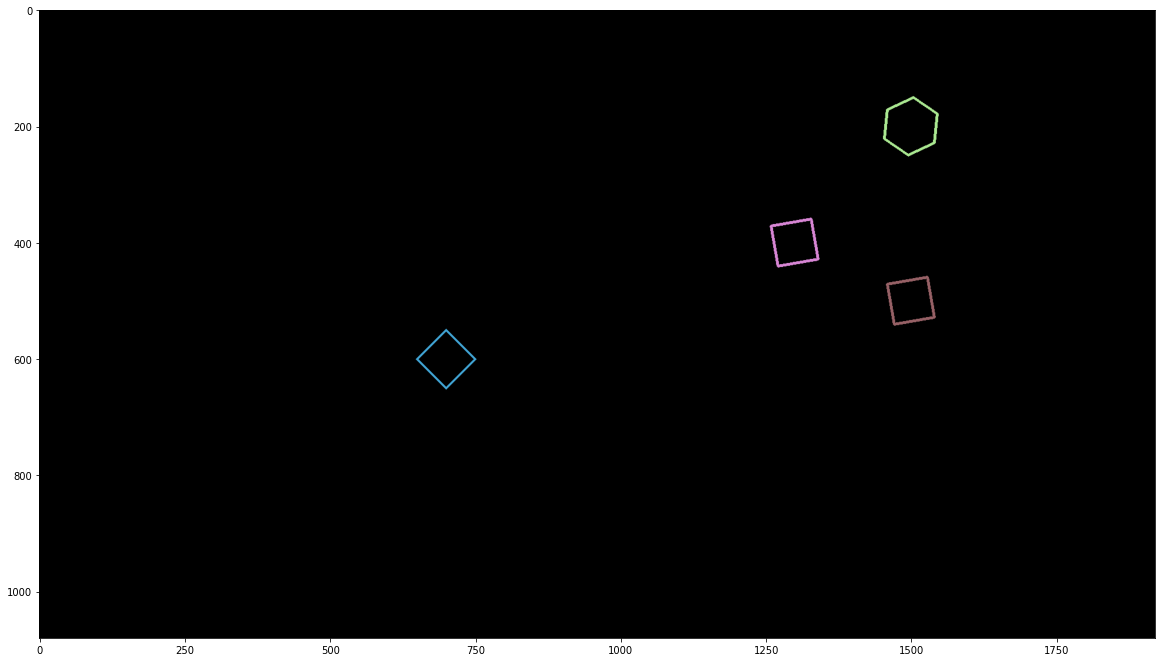

In [191]:
Images=[closing_1,closing_2,closing_3]
Blanks=[0,0,0]
Contours=[]
for i in range(3):
    contours, hierarchy = cv.findContours(Images[i], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    Blanks[i]=np.zeros((Images[i].shape[0],Images[i].shape[1],3),dtype=np.uint8)
    Contours.append(contours)
    for j in range(len(contours)):
        cv.drawContours(Blanks[i], contours, j,(np.random.randint(100,256),np.random.randint(256),np.random.randint(50,256)),3)
fig, ax = plt. subplots(figsize = (20,20)) 
ax.imshow(cv.cvtColor(Blanks[2], cv.COLOR_BGR2RGB))

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Detecting Objects on a Synthetic Conveyor

> *In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.<br><br>Open the sequence and play it using the code below.*

In [192]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('Sources/conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


>*Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.<br><br>Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.*

Equal Elements =  1


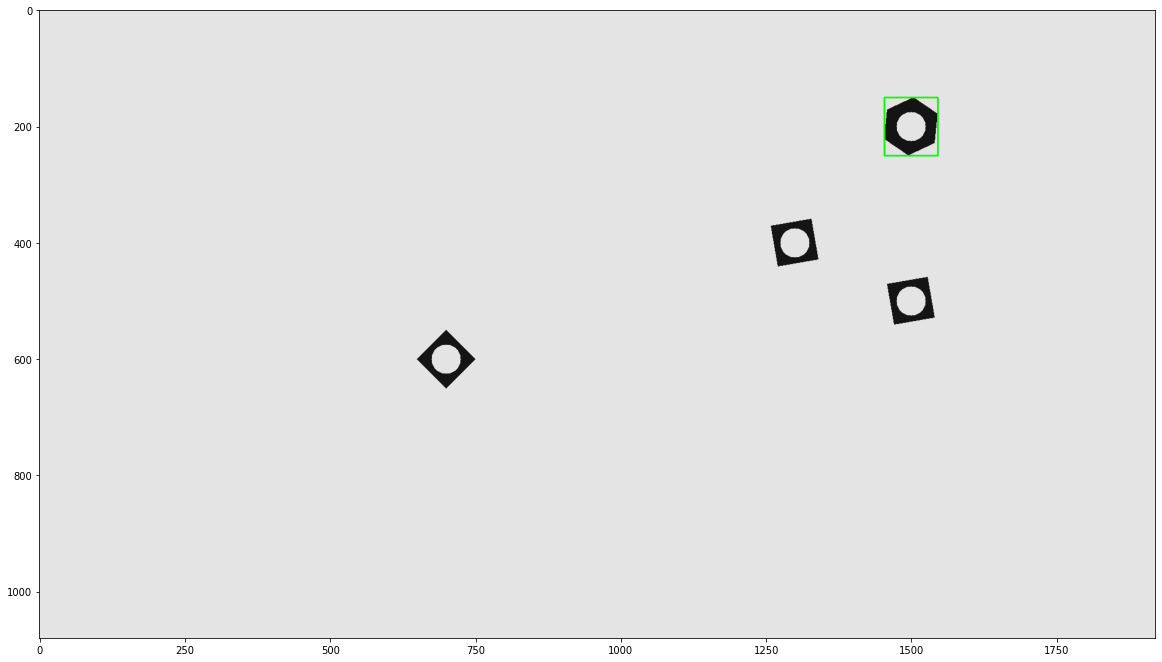

In [193]:
Base_Ctr=Contours[0][0]
conveyor_f100 =  cv.cvtColor(conveyor_f100,cv.COLOR_GRAY2BGR)

Count=0
for i in Contours[2]:
    ret = cv.matchShapes(Base_Ctr,i,1,0.0)
    if ret<0.001:
        Count+=1
        x,y,w,h = cv.boundingRect(i)
        cv.rectangle(conveyor_f100,(x,y),(x+w,y+h),(0,255,0),2)
print("Equal Elements = ",Count)

fig, ax = plt. subplots(figsize = (20,20)) 
ax.imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))

In [194]:
# Yor code here.
def Count_Ctr(frame):
    global Base_Ctr
    frame_gr =  cv.cvtColor(frame,cv.COLOR_RGB2GRAY)
    ret,th = cv.threshold(frame_gr,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel=np.ones((3,3),np.uint8)
    closing = cv.morphologyEx(th, cv.MORPH_CLOSE, kernel)
    contours, hierarchy = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    Count=0
    for i in contours:
        ret = cv.matchShapes(Base_Ctr,i,1,0.0)
        if ret<0.001:
            Count+=1
            x,y,w,h = cv.boundingRect(i)
            cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    return (Count,frame)

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('Sources/conveyor.mp4')
f = 0
frame_array = [] 
Running_Sum={"Prev":0,"Total":0}
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    Count,frame=Count_Ctr(frame)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    text = 'Current Contours:' + str(Count)
    cv.putText(frame,text , (100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)
    if Running_Sum["Prev"]==Count:
        Total=Running_Sum["Total"]
    else:
        added_val=max(Count-Running_Sum["Prev"],0)
        Running_Sum["Total"]+=added_val
    Total=Running_Sum["Total"]
    Running_Sum["Prev"]=Count
    text = 'Total Contours:' + str(Total)
    cv.putText(frame,text , (100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,250), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    if cv.waitKey(1) == ord('q'):  
        break
    frame_array.append(frame)
# Writing the video
cap.release()
cv.destroyAllWindows()

shape = (1080, 1920, 3)

out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
